In [1]:
import numpy as np
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

# Reading the Data

In [2]:
df = pd.read_csv('../data/linear.csv')

In [3]:
df.head()

,x,y
0,0.000000,-51.000000
1,25.000000,-12.000000
2,117.583220,134.907414
3,108.922466,134.085180
4,69.887445,NaN


In [4]:
df.isnull().sum()[df.isnull().sum()>0] #boolean mask/boolean selection 

y    8
dtype: int64

In [5]:
# dropping the null values
df.dropna(inplace=True) #inplace=True to make the changes permanent

# Train test split

```python 
x_cols = ['x']
y_cols = ['y']


#method 1 
X = df[x_cols].values
y = df[y_col].values

#method 2 
X = df[x_cols].values 
y = df.drop(x_cols, axis=1)

#method 3 
X = df.loc[:, x_cols]
y = df.loc[:, y_cols]

#method 4 
X  = df.iloc[:,:-1] #everything except the last column
y = df.iloc[:,-1] #everything and only the last column
```

In [6]:
X =df.iloc[:,:-1]
y = df.iloc[:,-1]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

# Creating the LinearRegression model

In [8]:
reg = LinearRegression(fit_intercept=True)

# Fitting the data / training the model 

In [9]:
reg.fit(X_train, y_train)

LinearRegression()

# Making predictions on test set 

In [10]:
train_pred = reg.predict(X_train)
test_pred = reg.predict(X_test)

In [11]:
reg.predict(np.array([5]).reshape((-1,1)))

array([-42.9350823])

# Testing the model

In [12]:
# printing the equation 
beta = reg.coef_ # beta (written as b*x in eqn)
#coef_ returns a numpy array even though there is a single coef  
alpha = reg.intercept_ #alpha 

print(f'The equation is {alpha:.3} + {beta[0]:.3}*X')

The equation is -50.8 + 1.57*X


In [13]:
# Printing the R^2 for training and test set
print(f'The R squared value for training set is {reg.score(X_train, y_train):.3}')
print(f'The R squared value for test set is {reg.score(X_test,y_test):.3}')

The R squared value for training set is 0.978
The R squared value for test set is 0.982


# Plotting the predictions vs actual data 

In [14]:
# creating a model without intercept and fitting it 
reg_no_intercept = LinearRegression(fit_intercept=False).fit(X_train, y_train) #creating and fitting it in one line 
pred_no_intercept = reg_no_intercept.predict(X_train)

print(f'R squared for training set without intercept is {reg_no_intercept.score(X_train, y_train)}')

R squared for training set without intercept is 0.8607848424294884


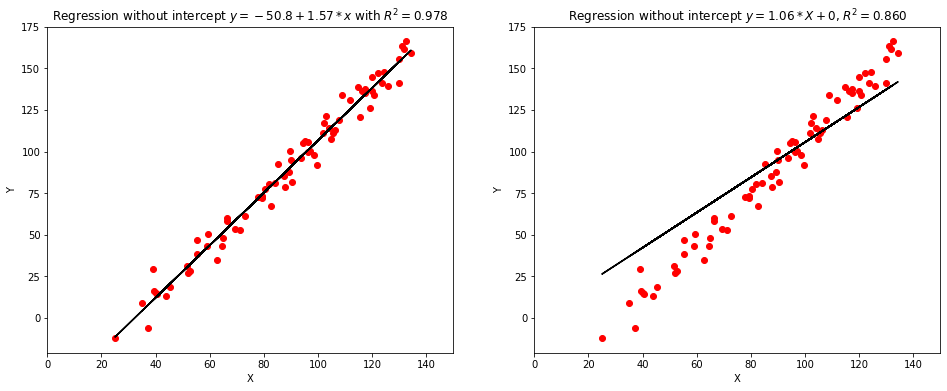

In [15]:
fig, ax = plt.subplots(figsize=(16,6),nrows=1, ncols=2)
ax[0].scatter(X_train, y_train, color='red')
ax[0].plot(X_train, train_pred, color='black')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_title(r'Regression without intercept $y=-50.8 + 1.57*x$ with $R^2 = 0.978$')
ax[0].set_xlim(0,150)
ax[1].scatter(X_train, y_train, color='red')
ax[1].plot(X_train, pred_no_intercept, color='black')
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
ax[1].set_title(r'Regression without intercept $y = 1.06*X+0$, $R^2 = 0.860$')
ax[1].set_xlim(0,150)
plt.show()